# MS-E2122 - Nonlinear Optimisation
### Professor Fabricio Oliveira

## Exercise 1.1

This notebook has the implementation used in the first exercises. Go throughh the code carefully and use this as examples for the future, while you familiarise yourself with Julia.


### An example of how plotting works in Julia. We will plot the function

$f(x) = 2x^4 - 5x^3 - x^2$ with $x \in [-3,3]$


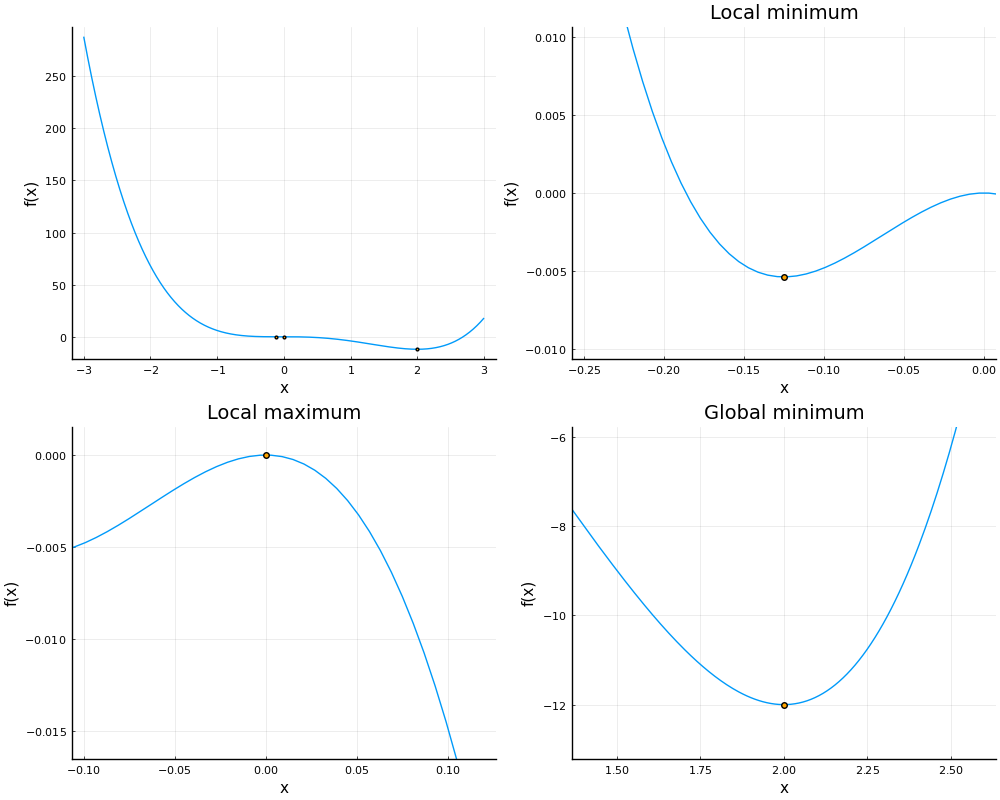

In [11]:
using Plots                  # Package used for plotting

n = 1000                     # We use 1000 samples
x = LinRange(-3,3,n)         # between [-3,3]. Alternatively: range(-3,3,length=n) 

f(x) = 2x.^4 - 5x.^3 - x.^2  # Notice the .^ notation to handle vector inputs (broadcasting)

## Plot function and mark its extreme points
p1 = plot(x, f(x),
          legend = false,
          xlabel = "x", 
          ylabel = "f(x)"   
)

scatter!([-1/8, 0, 2], [f(-1/8), f(0), f(2)], color = :orange, markersize = 2)

## Local minimum
p2 = plot(x, f(x),
          title  = "Local minimum",
          legend = false,
          xlabel = "x", 
          ylabel = "f(x)",
          xlim   = [-0.25, 0],
          ylim   = [-0.01,0.01]  
)
scatter!([-1/8], [f(-1/8)], color = :orange)

# Local maximum
p3 = plot(x, f(x),
          title  = "Local maximum",
          legend = false,
          xlabel = "x", 
          ylabel = "f(x)",
          xlim   = [-0.1, 0.12], 
          ylim   = [-0.016, 0.001]
)
scatter!([0], [f(0)], color = :orange)

## Global minimum
p4 = plot(x, f(x),
          title  = "Global minimum",
          legend = false,
          xlabel = "x", 
          ylabel = "f(x)",
          xlim   = [1.4, 2.6],
          ylim   = [-13, -6]           
)
scatter!([2], [f(2)], color = :orange)

## Plot all in same figure
plot(p1, p2, p3, p4, size = (1000, 800))

## Exercise 1.2

An example how to plot surface and contour plots in Julia. We will plot the surface and the contour of the function

$f(x,y) = (y - x^2)^2 - x^2$

In [35]:
using Plots                  # Plots package
pyplot()                     # Sets PyPlot as the backend (plotting engine)    
                             # Cool alternatives: plotly() (interactive) and gr() (faster)   
n10= 500                      # We use a 1000*1000 grid in (x,y)-plane
x = LinRange(-0.6,0.6,n)     # between (x,y) ∈ ([-.6,.6],[-.6,.6])
y = LinRange(-0.6,0.6,n)

f(x,y) = (y - x^2)^2 - x^2   # Note the lack of vector syntax: we compute each point separately

## Compute each grid point separately with a "Comprehension" (same as 2 for- loops, but generally slower)
z = [f(x[i], y[j]) for j = 1:n, i = 1:n]

## Contour plot of tce function
contour(x,y,z,
        legend  = false,
        clabels = true,
        clims = (-0.3,0.3),
        size = (900,900),
        aspect_ratio = :equal,
        xlim   = [-0.5, 0.5],
        ylim   = [-0.5, 0.5],
        xlabel = "x",
        ylabel = "y",
        title  = "Contours of f(x,y) = (y - x²)² - x²",
)

## Mark the extreme point
scatter!([0], [0], color = :orange, legend = true, label = "Saddle point")

LoadError: syntax: unexpected ","

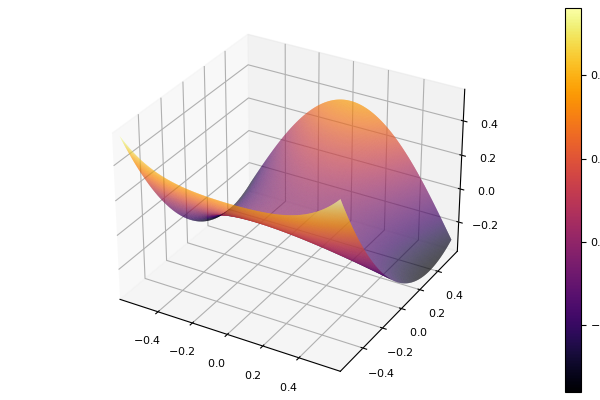

In [13]:
# This plots the actual surface. Might take a while the first time you plot (~40s)
surface(x,y,z)  # this might take a while (~40s) in the first time

## Exercise 1.3

Univariate Newton's method for finding extreme points of different functions

$f(x) = x^4 - x^3 - 8x^2$

In [34]:
using Plots              # For plotting
using ForwardDiff        # For computing derivatives with automatic differentiation

## Function to minimize
f(x) = x^4 - x^3 - 8x^2 

ϵ     = 1e-06            # Tolerance for stopping criterion
N     = 100              # Number of iterations
xn    = zeros(N + 1)     # Store values xn of Newton
xn[1] = 1                # Initial value

## First and second order derivatives
D(f, x)  = ForwardDiff.derivative(f, x)
D²(f, x) = ForwardDiff.derivative(y -> ForwardDiff.derivative(f, y), x)

## Newton step
for i = 1:N
    xn[i+1] = xn[i] - D(f, xn[i])/D²(f, xn[i])
    ## Check stopping condition
    if abs(D(f, xn[i+1])) < ϵ
        ## Cut off unnecessary values if converged
        xn = xn[1:i+1]
        break
    end
end

## Values of Newton iterations
fn = f.(xn)

## Plot results
n = 1000                      # Number of samples
x = LinRange(-3,4,n)          # Range to plot
z = f.(x)                     # Original function values (uses . notation to "broadcast" - 
                              #                           similar to vectorized function call)
## Plot original function
plot(x, z,                   
     lab    = "f(x)",         
     xlabel = "x",
     ylabel = "f(x)",
     size   = (900,900))     

## Plot Newton iterations in the same figure with plot!(...)
plot!(xn, fn,                 
      lab       = "Newton's method",   
      linestyle = :dash,
      linewidth = 2,
      xlim      = [-3,4],
      ylim      = [-30,20])

## Mark the iteration points 
scatter!([xn], [fn], markersize = 4, color = :orange, lab = "Iteration points")

LoadError: syntax: extra token "4" after end of expression

## Exercise 1.4 

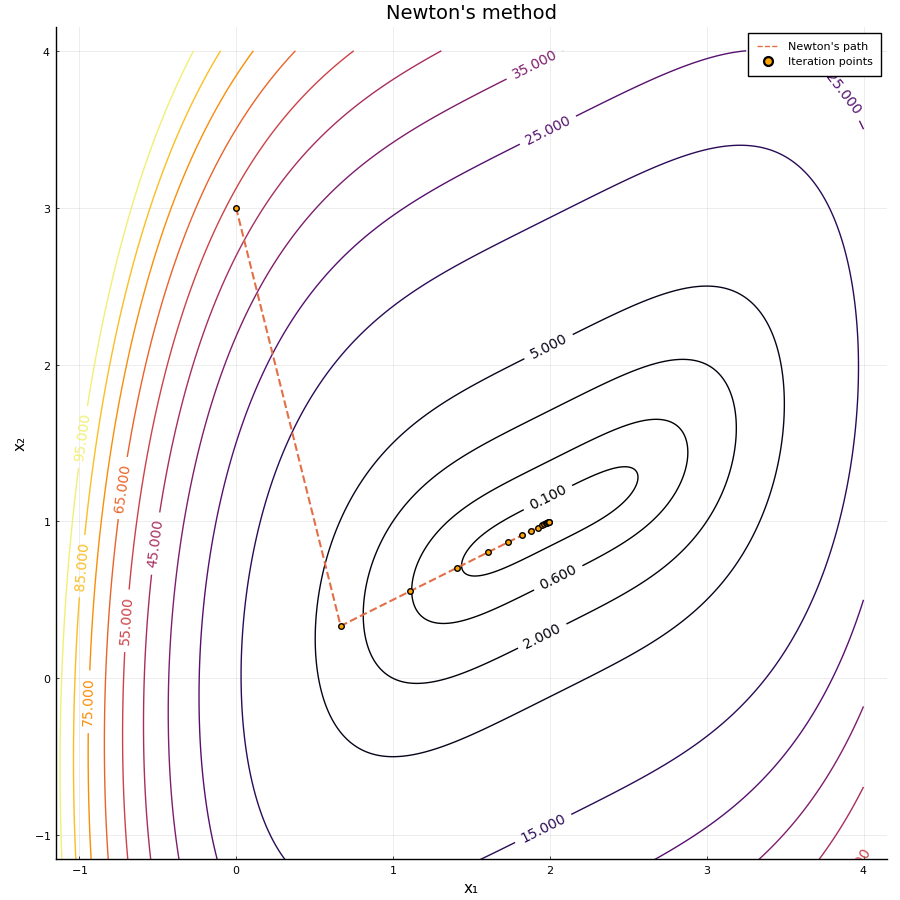

sys:1: UserWarning: The following kwargs were not used by contour: 'label'


In [22]:
using Plots             # For plotting
pyplot()
using LinearAlgebra     # For computing norm(...)
using ForwardDiff       # For computing gradients using automatic differentiation

## Function to minimize
f(x) = (x[1] - 2)^4 + (x[1] - 2x[2])^2

ϵ  = 1e-06          # Tolerance for stopping criterion
N  = 100            # Number of iterations
xn = zeros(N+1,2)   # Store values xn of Newton
xn[1,:] = [0,3]     # Initial value

## Gradient and Hessian 
∇(f, x)  = ForwardDiff.gradient(f, x)
∇²(f, x) = ForwardDiff.hessian(f, x)

## Newtown step
for i = 1:N
    xn[i+1,:] = xn[i,:] - inv(∇²(f, xn[i,:]))*∇(f, xn[i,:])
    ## Check stopping condition
    if norm(∇(f, xn[i+1,:])) < ϵ
        ## Cut off unnecessary values
        xn = xn[1:i+1,:]
        break
    end
end

## Values of Newton iterations
fn = [f(xn[i,:]) for i = 1:size(xn,1)]

## Plot results
n = 1000
x1 = LinRange(-2,4,n)
x2 = LinRange(-2,4,n)

## Original function values
z  = [f([x1[i], x2[j]]) for j = 1:n, i = 1:n]

## Plot contours of z = f(x) and set values for which contours to plot
contour(x1,x2,z, 
        legend  = false,
        clabels = true,
        clims   = (0,100),
        levels  = [0.1;0.6;2;collect(5:10:100)],
        size = (900, 900),
        aspect_ratio = :equal,
        xlabel = "x₁",
        ylabel = "x₂",  
        title  = "Newton's method",
)

## Plot Newton iterations
plot!(xn[:,1], xn[:,2], 
      legend    = true,
      lab       = "Newton's path",   # Label for Newton iterations
      linestyle = :dash,
      linewidth = 1.5,
      xlim      = [-1,4],
      ylim      = [-1,4],
)

## Plot the Newton iteration points
scatter!(xn[:,1], xn[:,2], markersize = 4, color = :orange, lab = "Iteration points")

## Exercise 1.5

In [23]:
using JuMP         # JuMP: Modeling language and solver interface
using Ipopt        # Nonlinear programming solver
using CSV          # For reading CSV files
using DataFrames   # For arranging data to a nice format

## Struct for arcs 
struct Arc
    i::String      # Head node of arc (i,j) ∈ A
    j::String      # Tail node of arc (i,j) ∈ A
end

## Struct for nodes
struct Node
    cost::Float64  # Node costs for s∈S and profits for t∈T
    qlb::Float64   # Lower property value bound
    qub::Float64   # Upper property value bound
    bub::Float64   # Upper flow bound
end


In [24]:
## Read arc data
adata = CSV.read("arcs.csv", DataFrame) # Julia has base function read(); CSV.read tell we want the CSV's read(function); 
println(adata)

## Set arc array
inode = adata[!, 1]
jnode = adata[!, 2]
A     = Arc.(inode, jnode)

## Read the node data 
ndata = CSV.read("nodes.csv", DataFrame)
println(ndata)

## Number of rows in the nodes.csv file
nnode = size(ndata, 1)   

## Split V into source, pool, and target nodes 
V     = ndata[!, 1]                                  # All nodes                   
S     = [V[i] for i = 1:nnode if ndata[i,2] == "s"]  # Source nodes
P     = [V[i] for i = 1:nnode if ndata[i,2] == "p"]  # Pool nodes
T     = [V[i] for i = 1:nnode if ndata[i,2] == "t"]  # Target nodes

## Resource bounds of each node
cost  = ndata[!, 3]
qlb   = ndata[!, 4]    # Lower bounds of property 1
qub   = ndata[!, 5]    # Upper bounds of property 1
bub   = ndata[!, 6]    # Upper flow bounds

## Set node array and make a dictionary for convenience  
N = Node.(cost, qlb, qub, bub)
N = Dict(V[i] => N[i] for i = 1:size(V,1))

6×2 DataFrame
 Row │ inode   jnode  
     │ String  String 
─────┼────────────────
   1 │ s1      p1
   2 │ s2      p1
   3 │ s3      t1
   4 │ s3      t2
   5 │ p1      t1
   6 │ p1      t2
6×6 DataFrame
 Row │ nodes   nodetype  nodecosts  q_lb     q_ub     flow_ub 
     │ String  String    Float64    Float64  Float64  Float64 
─────┼────────────────────────────────────────────────────────
   1 │ s1      s               6.0      3.0      3.0    Inf
   2 │ s2      s              16.0      1.0      1.0    Inf
   3 │ s3      s              10.0      2.0      2.0    Inf
   4 │ p1      p               0.0      0.0    Inf      Inf
   5 │ t1      t               9.0      0.0      2.5    100.0
   6 │ t2      t              15.0      0.0      1.5    200.0


Dict{String,Node} with 6 entries:
  "s1" => Node(6.0, 3.0, 3.0, Inf)
  "t2" => Node(15.0, 0.0, 1.5, 200.0)
  "s2" => Node(16.0, 1.0, 1.0, Inf)
  "p1" => Node(0.0, 0.0, Inf, Inf)
  "s3" => Node(10.0, 2.0, 2.0, Inf)
  "t1" => Node(9.0, 0.0, 2.5, 100.0)

In [25]:
## Define solver
model = Model(optimizer_with_attributes(Ipopt.Optimizer, "print_level" => 3))

## Variables
@variable(model, x[A] >= 0)       # Arc flows
@variable(model, q[i in V] >= 0)  # Property values

## Cost and revenue
@expression(model, cost,    sum(N[s].cost*x[a] for s in S, a in A if a.i == s))
@expression(model, revenue, sum(N[t].cost*x[a] for t in T, a in A if a.j == t))

## Objective
@objective(model, Max, revenue - cost)

## Constraints
# Flow balance
@constraint(model, [p in P], sum(x[a] for a in A if a.j == p) ==
                             sum(x[a] for a in A if a.i == p))
# Upper flow bound at T nodes
@constraint(model, [t in T], sum(x[a] for a in A if a.j == t) <= N[t].bub)
# Sulfur balance at P nodes
@constraint(model, [p in P], sum(q[a.i]*x[a] for a in A if a.j == p) ==
                        q[p]*sum(x[a] for a in A if a.i == p))
# Sulfur balances at T nodes
@constraint(model, [t in T], sum(q[a.i]*x[a] for a in A if a.j == t) ==
                        q[t]*sum(x[a] for a in A if a.j == t))
# Sulfur upper bounds at T nodes
@constraint(model, [t in T], q[t] <= N[t].qub)
# Sulfur values at S nodes (here N[s].qlb == N[s].qub so either can be used)
@constraint(model, [s in S], q[s] == N[s].qub)

# Try different initial values for the pool nodes. Try, e.g., values 1.0 and 2.5
set_start_value(q["p1"], 1.0)

# Print model. NOTE: Print model at any point to see how it looks
 println(model)

Max -x[Arc("s3", "t1")] + 9 x[Arc("p1", "t1")] + 5 x[Arc("s3", "t2")] + 15 x[Arc("p1", "t2")] - 6 x[Arc("s1", "p1")] - 16 x[Arc("s2", "p1")]
Subject to
 x[Arc("s1", "p1")] + x[Arc("s2", "p1")] - x[Arc("p1", "t1")] - x[Arc("p1", "t2")] == 0.0
 q[s1] == 3.0
 q[s2] == 1.0
 q[s3] == 2.0
 x[Arc("s3", "t1")] + x[Arc("p1", "t1")] <= 100.0
 x[Arc("s3", "t2")] + x[Arc("p1", "t2")] <= 200.0
 q[t1] <= 2.5
 q[t2] <= 1.5
 q[s1]*x[Arc("s1", "p1")] + q[s2]*x[Arc("s2", "p1")] - x[Arc("p1", "t1")]*q[p1] - x[Arc("p1", "t2")]*q[p1] == 0.0
 q[s3]*x[Arc("s3", "t1")] - x[Arc("s3", "t1")]*q[t1] + q[p1]*x[Arc("p1", "t1")] - x[Arc("p1", "t1")]*q[t1] == 0.0
 q[s3]*x[Arc("s3", "t2")] - x[Arc("s3", "t2")]*q[t2] + q[p1]*x[Arc("p1", "t2")] - x[Arc("p1", "t2")]*q[t2] == 0.0
 x[Arc("s1", "p1")] >= 0.0
 x[Arc("s2", "p1")] >= 0.0
 x[Arc("s3", "t1")] >= 0.0
 x[Arc("s3", "t2")] >= 0.0
 x[Arc("p1", "t1")] >= 0.0
 x[Arc("p1", "t2")] >= 0.0
 q[s1] >= 0.0
 q[s2] >= 0.0
 q[s3] >= 0.0
 q[p1] >= 0.0
 q[t1] >= 0.0
 q[t2] >= 0.0


In [26]:
## Solve model
optimize!(model)
status = termination_status(model)
println(status)

## Get objecive + solution
obj = objective_value(model)
x   = value.(x)
q   = value.(q)

## Print solution
println("\n\nSolution cost: ", round(obj, digits = 4))
println("\nFlows: \n")
for a in A
    println("x($(a.i),$(a.j)) = ", round(x[a], digits = 4))
end

println("\nProperty values:\n")
for p in P
    println("q[$p] = ", round(q[p], digits = 4))
end
for t in T
    println("q[$t] = ", round(q[t], digits = 4))
end


Total number of variables............................:       12
                     variables with only lower bounds:       12
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        7
Total number of inequality constraints...............:        4
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        4


Number of Iterations....: 57

                                   (scaled)                 (unscaled)
Objective...............:  -4.0000002208742444e+02    4.0000002208742444e+02
Dual infeasibility......:   1.3942187787438366e-13    1.3942187787438366e-13
Constraint violation....:   1.6212740006039342e-22    1.6212740006039342e-22
Complementarity.........:   2.5059954362211914e-09   -2.5059954362211914e-09
Overall NLP e